# CSCI 5897 Homework 1
### Anya Lee

### **Problem 1**
Following the SIR in-class demo notebook (in Class\_Notes) which simulates the SIR model in the absence of population growth, I was able to write a function in Python that uses Forward Euler method to simulate the SIR model *in which the population is slowly growing*. 

In your simulations, suppose that we have an initial population of size $N=1000$, with $I_0=1$, $S_0=999$. Suppose that $\beta=1$, $\gamma=0.5$, and then $\mu_{\text{birth}}=0.01$ and $\mu_{\text{death}} = \tfrac{1}{2} \mu_\text{birth}$. 

Produce a single plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50\% to a total of $N=1500$. Be sure to include a legend and your name in the title of the plot.

When the population is slowly growing, we have the following system of ordinary differential equations now that we are accounting for birth and death, where birth rate $\mu_{birth} > \mu_{death}$. As learned in class, we have the following system.
\begin{align}
\dot{S} &= \frac{-\beta SI}{N} + \mu_{birth} N - \mu_{death} S \\
\dot{I} &= \frac{\beta SI}{N} - \gamma I - \mu_{death} I \\
\dot{R} &= \gamma I - \mu_{death} R
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SIR_growth(S0, I0, R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    
    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx-1] + I[idx-1] + R[idx-1]

            dS_dt = -beta * S[idx-1] * I[idx-1] / N + mu_birth*N - mu_death*S[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma*I[idx-1] - mu_death*I[idx-1]
            dR_dt = gamma*I[idx-1] - mu_death*R[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize

    return S, I, R, T

Text(0.5, 1.0, 'SIR with Population Growth. Anya Lee.')

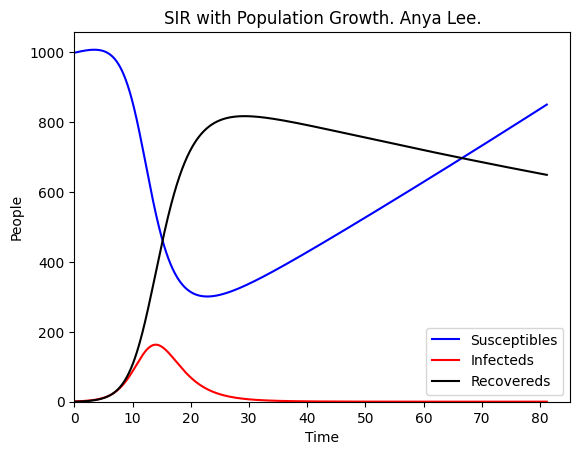

In [3]:
# SIR(S0,I0,R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
beta = 1
gamma = 0.5
mu_birth = 0.01
mu_death = 0.5*mu_birth
t_max = 81.11

S,I,R,T = SIR_growth(999, 1, 0,
             beta, gamma, mu_birth, mu_death, t_max, 0.05)

fig, ax = plt.subplots()
ax.plot(T,S, color = 'b', label='Susceptibles')
ax.plot(T,I, color = 'r', label='Infecteds')
ax.plot(T,R, color = 'k', label='Recovereds')
ax.set_xlabel('Time')
ax.set_ylabel('People')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("SIR with Population Growth. Anya Lee.")

Above, we obtain a plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50% to a total of $N=1500$. Note: I could have used a "while" loop, but chose to find out when the total population reaches $N=1500$ manually. The computation is below.

We know we can model population growth using the exponential growth equation and from previous knowledge we know $r =\mu_{birth} - \mu_{death} > 0 $ where $r$ is the growth rate. So we have the solution:
$$
N(t) = N_0e^{rt}
$$
where $N_0 = S_0 + I_0 + R_0$.

We can solve for $t_{max}$ using this equation since all other values are known.
$$
\begin{align}
1500 &= 1000e^{rt_{max}} \\
1.5 &= e^{rt_{max}} \\
ln(1.5) &= ln(e^{rt_{max}}) \\
ln(1.5) &= rt_{max} \\
t_{max} &= \frac{ln(1.5)}{r}
\end{align}
$$

Now, from the problem statement, we know $\mu_{birth}=0.01 \text{and} \mu_{death}=0.5*\mu_{birth}=0.5*0.01=0.005$. Recall that $r =\mu_{birth} - \mu_{death} = 0.01-0.005 = 0.005$. Now we can solve for $t_{max}$.
$$
\begin{align}
t_{max} &= \frac{ln(1.5)}{r} \\
t_{max} &= \frac{ln(1.5)}{0.005} \\
t_{max} &\approx 81.093
\end{align}
$$

We then use $t_max=81.093$ in the above simulation.

In [4]:
N = S + I + R  # after simulation
print("Final N:", N[-1])

Final N: 1500.3513135240373


### **Problem 2**
The goal of this problem is to show an important fact about transition rates in compartmental models. It is also a good chance to become refreshed on simple ODE solving and separation of variables. Finally, it makes good on a promise made in lecture notes to ask this homework question!
	
Imagine that we are interested in SIR dynamics, but everyone starts out either infected or recovered, and no one starts out susceptible.

a. Use this information to simplify the typical equation for $\dot{I}$.  

b. Solve your simplified differential equation with the initial condition $I(0) = I_0$.  

c. Manipulate your solution to derive the fraction of the initially infected people who are still infected at time $t$.  

d. Discuss this equation. What does it do over time? How is it related to the fraction of infected people who have *left* the infected class?  

e. This formula produces values between $0$ and $1$, and it tells us the probability that a randomly chosen infected person is still infected at time $t$. How does this relate to the cumulative distribution function (CDF) that describes the probability that someone is infected for less than or equal to $t$ units of time? Take a derivative of the CDF to get a PDF for the duration of infection lengths. Then, find out what this famous probability distribution is called, and write down its expected value.  

f. Use your results to explain how the recovery rate $\gamma$ is related to the typical amount of time a person remains infectious.

### **Problem 3**
The goal of this problem is to (i) figure out how to solve the final epidemic size equation, and (ii) test the equation's predictions.

a. First, explain how an epidemic's total size, also called its cumulative incidence, is related to $s_\infty$ and $r_\infty$. 

b. Recall that
$$
\begin{align}
r_\infty = 1-e^{-R_0 r_\infty}
\end{align}
$$
Though we can't solve this equation, we can use a valuable graphical technique as follows. First, we define a function $f(r_\infty) = r_\infty$ and define a second function $g(r_\infty) = 1-e^{-R_0 r_\infty}$. Note that $f$ is the left hand side of Eq. (1), while $g$ is the right hand side. This allows us to plot $f$ and plot $g$, both as a function of $r_\infty$, to see where they cross---that is, where $f=g$. 

Create four plots for $R_0 \in \{0.9, 1.0, 1.1, 1.2\}$ with $f$ in black and $g$ in red. Use the **fsolve** function to find the intersection point, and use matplotlib's **scatter** function to plot a blue circle at the intersection.

c. Comment on what you see in the plots in the context of what we have learned about $R_0$. What do you see in your figures? What happens when $R_0 < 1$ ?

d. Finally, test the predictions made by this final-size equation by using your SIR code and $\beta=1$, $\gamma=0.5$ by creating a new version of that epidemic with a green dotted line at the height of $r_\infty$. Does this final size prediction work?

In [5]:
# Problem 3 Part (b)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

/var/folders/l5/mj2njn510j3f2kdhfymmndph0000gn/T/ipykernel_60388/691950676.py:16: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  intersection = fsolve(lambda r: f(r) - g(r, R0), 0.5)[0] # h(r_inf) = f(r_inf) - g(r_inf), initial guess at 0.5 (near 0)


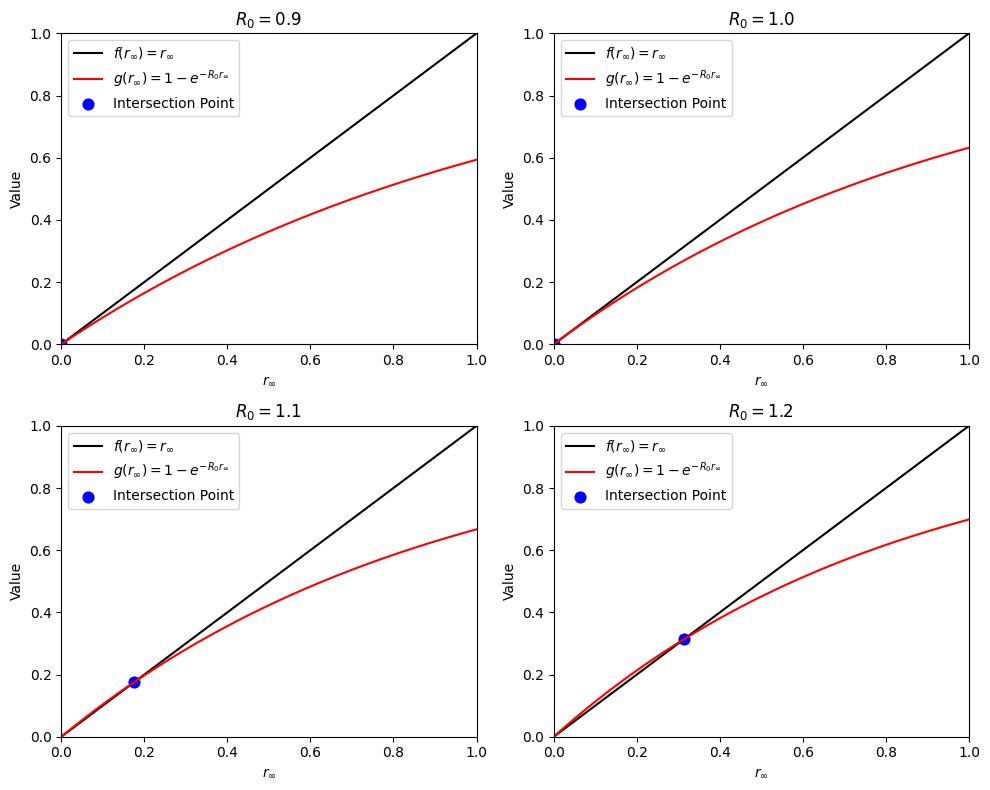

In [6]:
# Define f and g
def f(r_inf):
    return r_inf

def g(r_inf, R0):
    return 1 - np.exp(-R0 * r_inf)

R0_values = [0.9, 1.0, 1.1, 1.2]
r_inf_range = np.linspace(0, 1, 500)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, R0 in enumerate(R0_values):
    # Find intersection using fsolve
    intersection = fsolve(lambda r: f(r) - g(r, R0), 0.5)[0] # h(r_inf) = f(r_inf) - g(r_inf), initial guess at 0.5 (near 0)
    axes[idx].plot(r_inf_range, f(r_inf_range), 'k-', label='$f(r_\\infty) = r_\\infty$')
    axes[idx].plot(r_inf_range, g(r_inf_range, R0), 'r-', label='$g(r_\\infty) = 1-e^{-R_0 r_\\infty}$')
    # Use scatter for intersection point
    axes[idx].scatter(intersection, f(intersection), color='blue', s=60, label='Intersection Point')
    axes[idx].set_title(f'$R_0 = {R0}$')
    axes[idx].set_xlabel('$r_\\infty$')
    axes[idx].set_ylabel('Value')
    axes[idx].legend()
    axes[idx].set_xlim(0, 1)
    axes[idx].set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [7]:
# Problem 3 Part (d)
# SIR model from in-class demo
def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0, t_max+stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0

    for idx,t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

Text(0.5, 1.0, 'SIR Model Simulation with $\\beta=1, \\gamma = 0.5, R_0 = 2$')

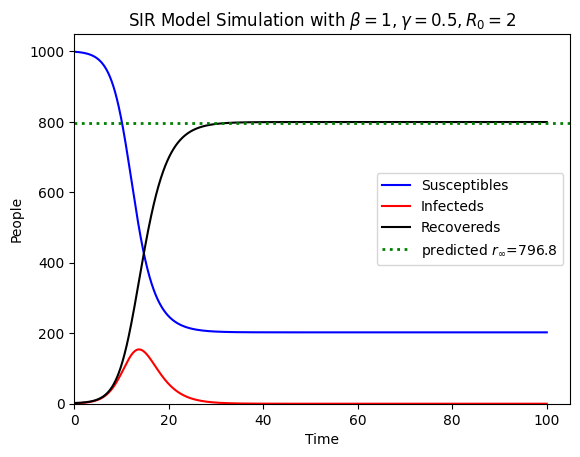

In [8]:
# Parameters
beta = 1
gamma = 0.5
R0 = beta / gamma # should be 2

def h(r):
    return r - (1 - np.exp(-R0 * r))

# use fsolve() again
r_inf_fraction = fsolve(h, 0.5) # inital guess is 0.5 (guess near 0)
N = 1000
r_inf_abs = r_inf_fraction * N # convert fraction to absolute number

# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
S,I,R,T = SIR(999,1,R0,
             beta,gamma,100,0.05)

fig, ax = plt.subplots()
ax.plot(T,S, color = 'b', label='Susceptibles')
ax.plot(T,I, color = 'r', label='Infecteds')
ax.plot(T,R, color = 'k', label='Recovereds')
# Add predicted final size as green dotted line
ax.axhline(r_inf_abs[0], color='g', linestyle=':', linewidth=2, 
           label=f'predicted $r_\\infty$={r_inf_abs[0]:.1f}')
ax.set_xlabel('Time')
ax.set_ylabel('People')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title(r"SIR Model Simulation with $\beta=1, \gamma = 0.5, R_0 = 2$")

### **Problem 4**
(Grad / EC): In class, we showed that the SIR model's disease-free equilibrium is stable when $s<\tfrac{1}{R_0}$ and unstable otherwise. Using $N=10^6$, and $\varepsilon = \frac{1}{N}$ as your perturbation, produce a single figure *using your simulation code and its output* that illustrates this point. Write a caption that explains the principle of stability, and explain how your figure illustrates it.

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [10]:
# Parameters
N = 10**6
eps = 1/N
beta = 0.3
gamma = 0.1
R0 = beta / gamma

# SIR system
def sir(t, y):
    s, i, r = y
    return [-beta*s*i, beta*s*i - gamma*i, gamma*i]

<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
/var/folders/l5/mj2njn510j3f2kdhfymmndph0000gn/T/ipykernel_60388/3397181517.py:29: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('New Cumulative Infections (Fraction of Population) $\Delta r$')


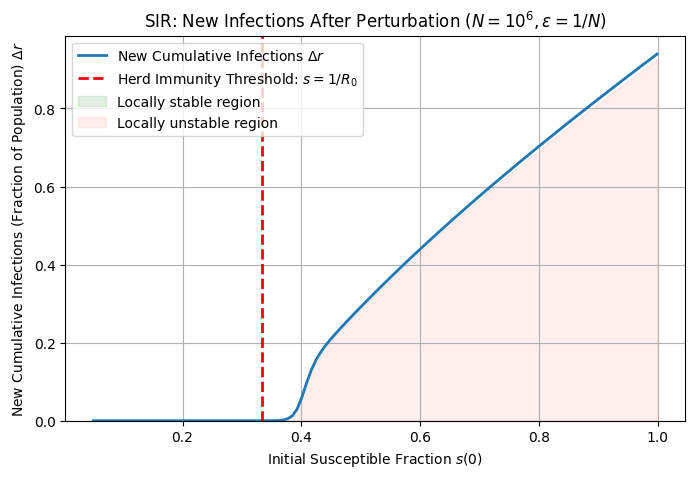

In [ ]:
# s range (avoid values <= eps)
s_values = np.linspace(0.05, 0.999, 120)
delta_r = []

tmax = 500.0  # long enough to reach equilibrium

for s0 in s_values:
    i0 = eps
    r0 = 1.0 - s0 - i0         # note: this changes as s0 changes
    # integrate
    sol = solve_ivp(sir, [0.0, tmax], [s0, i0, r0], atol=1e-10, rtol=1e-8)  # inital value problem: 0 to tmax, evaluate at t=500
    sF, iF, rF = sol.y[:, -1]
    delta_r.append(max(0.0, rF - r0))  # new infections caused by perturbation

delta_r = np.array(delta_r)

# Plot principle of stability
plt.figure(figsize=(8,5))
plt.plot(s_values, delta_r, lw=2, label=r'New Cumulative Infections $\Delta r$')
plt.axvline(1.0/R0, color='red', linestyle='--', lw=2, label=r'Herd Immunity Threshold: $s = 1/R_0$')

# Shade stability regions
plt.fill_between(s_values, 0, delta_r, where=(s_values < 1.0/R0), color='green', alpha=0.12,
                 transform=plt.gca().get_xaxis_transform(), label='Locally stable region')
plt.fill_between(s_values, 0, delta_r, where=(s_values >= 1.0/R0), color='salmon', alpha=0.12,
                 transform=plt.gca().get_xaxis_transform(), label='Locally unstable region')

plt.xlabel('Initial Susceptible Fraction $s(0)$')
plt.ylabel('New Cumulative Infections (Fraction of Population) $\Delta r$')
plt.title(r'SIR: New Infections After Perturbation ($N=10^6, \varepsilon=1/N$)')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.ylim(bottom=0)
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/var/folders/l5/mj2njn510j3f2kdhfymmndph0000gn/T/ipykernel_60388/345889966.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('New Cumulative Infections (Fraction of Population) $\Delta r$')
/var/folders/l5/mj2njn510j3f2kdhfymmndph0000gn/T/ipykernel_60388/345889966.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


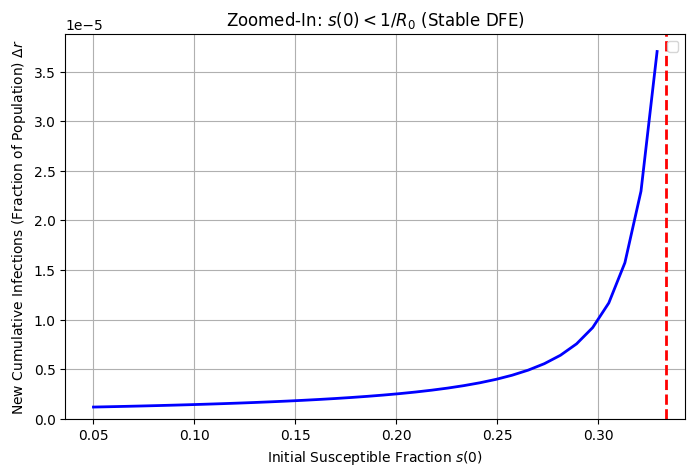

In [14]:
# Plot zoomed in on stable region
plt.figure(figsize=(8,5))
mask = s_values < 1.0/R0
plt.plot(s_values[mask], delta_r[mask], lw=2, color="blue")
plt.axvline(1.0/R0, color='red', linestyle='--', lw=2)
plt.xlabel('Initial Susceptible Fraction $s(0)$')
plt.ylabel('New Cumulative Infections (Fraction of Population) $\Delta r$')
plt.title('Zoomed-In: $s(0) < 1/R_0$ (Stable DFE)')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.ylim(bottom=0)
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/var/folders/l5/mj2njn510j3f2kdhfymmndph0000gn/T/ipykernel_60388/964028996.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('New Cumulative Infections (Fraction of Population) $\Delta r$')
/var/folders/l5/mj2njn510j3f2kdhfymmndph0000gn/T/ipykernel_60388/964028996.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


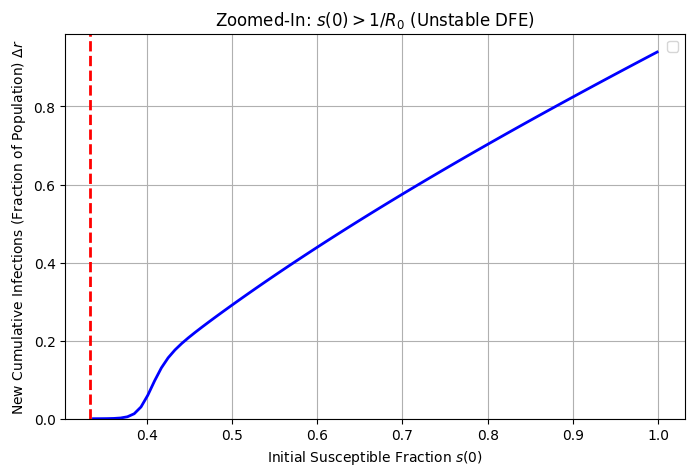

In [15]:
# Plot zoomed in on unstable region
plt.figure(figsize=(8,5))
mask = s_values > 1.0/R0
plt.plot(s_values[mask], delta_r[mask], lw=2, color="blue")
plt.axvline(1.0/R0, color='red', linestyle='--', lw=2)
plt.xlabel('Initial Susceptible Fraction $s(0)$')
plt.ylabel('New Cumulative Infections (Fraction of Population) $\Delta r$')
plt.title('Zoomed-In: $s(0) > 1/R_0$ (Unstable DFE)')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.ylim(bottom=0)
plt.show()